# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [71]:
! git clone https://www.github.com/DS3001/the_bootstrap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


1.1 - The probability of rolling a 1, 2, 3, 4, 5, or 6 on a single fair 6-sided die is 1/6 or .167.
If 2 dies are rolled, the probabilities change for Rmin. Now, there are 36 potential outcomes. The probability of Rmin equaling 1 is 1/36. The probability that Rmin=2 is 1/18. The probability that Rmin=3 is 1/9. The probability that Rmin=4 is 1/6. The probability that Rmin=5 is 2/9. Finally, the probability that Rmin=6 is 5/18. Therefore, the most likely Rmin value is 6. This is different compared to the single die roll where all of the values were equally as likely to be rolled.

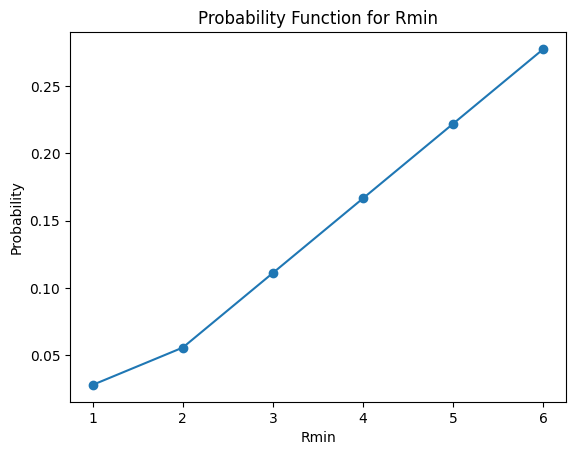

In [72]:
# probability function for Rmin
def P_Rmin(x):
    if x == 1:
        return 1/36
    elif x == 2:
        return 1/18
    elif x == 3:
        return 1/9
    elif x == 4:
        return 1/6
    elif x == 5:
        return 2/9
    elif x == 6:
        return 5/18
    else:
        return 0

# cdf function for Rmin
#based on bootstrap class code
def CDF_Rmin(x):
    return sum(P_Rmin(i) for i in range(1, x+1))

#law of large numbers stimulation - from chatGPT
def simulate_Rmin(num_trials):
    outcomes = np.random.randint(1, 7, size=(num_trials, 2))
    Rmin_values = np.minimum(outcomes[:, 0], outcomes[:, 1])
    return Rmin_values

#probability function plot
x_values = np.arange(1, 7)
probabilities = [P_Rmin(x) for x in x_values]

plt.scatter(x_values, probabilities)
plt.plot(x_values, probabilities)
plt.title('Probability Function for Rmin')
plt.xlabel('Rmin')
plt.ylabel('Probability')
plt.show()


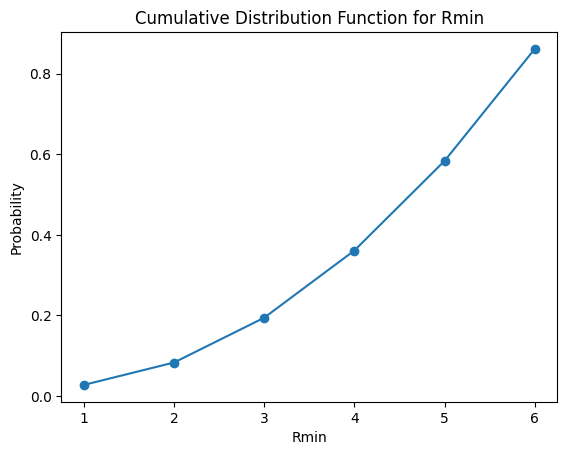

In [73]:
#cdf plot
#cdf function (not coded): F(x) = pr[Rmin<x]

CDF_values = [CDF_Rmin(x) for x in x_values]

plt.scatter(x_values, CDF_values)
plt.plot(x_values, CDF_values)
plt.title('Cumulative Distribution Function for Rmin')
plt.xlabel('Rmin')
plt.ylabel('Probability')
plt.show()

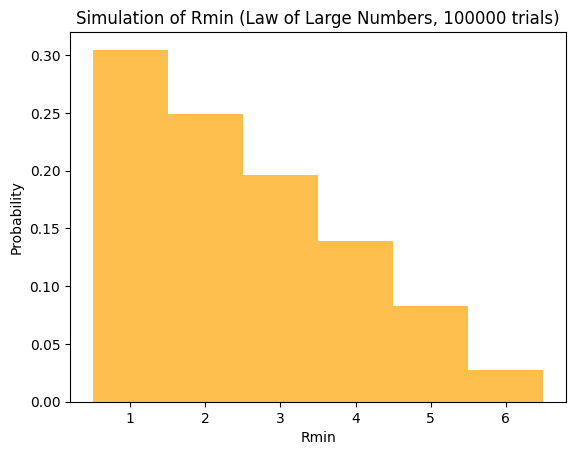

In [74]:
#law of large numbers stimulation plot - chatGPT

num_trials = 100000
simulated_values = simulate_Rmin(num_trials)

plt.hist(simulated_values, bins=np.arange(0.5, 7.5, 1), density=True, color='orange', alpha=0.7)
plt.title(f'Simulation of Rmin (Law of Large Numbers, {num_trials} trials)')
plt.xlabel('Rmin')
plt.ylabel('Probability')
plt.show()

1.2 - Imagine rolling three dice,  𝑑1 ,  𝑑2 , and  𝑑3 . Let  𝑅𝑚𝑒𝑑  be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of  𝑅𝑚𝑒𝑑 ? Plot the probability and cumulative distribution functions for  𝑅𝑚𝑒𝑑 . I recommend using simulations and the law of large numbers.

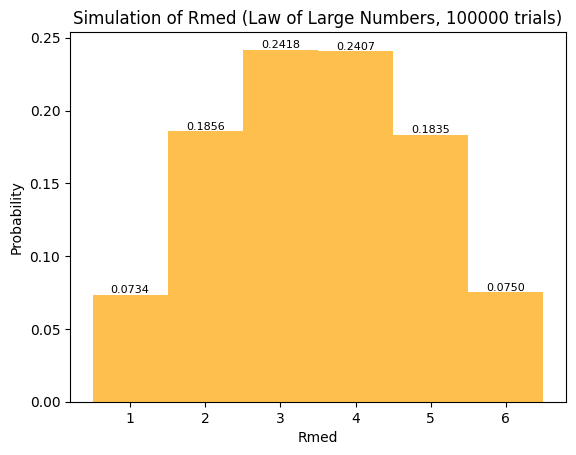

In [75]:
#simulate Rmed and use law of large numbers
def simulate_Rmed(num_trials):
    outcomes = np.random.randint(1, 7, size=(num_trials, 3))
    Rmed_values = np.median(outcomes, axis=1)
    return Rmed_values

#this number can be adjusted...law of large numbers
num_trials = 100000

# Simulate Rmed values
simulated_values = simulate_Rmed(num_trials)

# Calculate and plot exact probabilities on top of each bar - from chatGPT
values, counts = np.unique(simulated_values, return_counts=True)
probabilities = counts / num_trials

for value, probability in zip(values, probabilities):
    plt.text(value, probability, f'{probability:.4f}', ha='center', va='bottom', fontsize=8)

# Plot histogram of simulated values
plt.hist(simulated_values, bins=np.arange(0.5, 7.5, 1), density=True, color='orange', alpha=0.7)
plt.title(f'Simulation of Rmed (Law of Large Numbers, {num_trials} trials)')
plt.xlabel('Rmed')
plt.ylabel('Probability')
plt.show()

Probability that Rmed=1 is .0719.
Probability that Rmed=2 is .1862.
Probability that Rmed=3 is .2415.
Probability that Rmed=4 is .2425.
Probability that Rmed=5 is .1837.
Probability that Rmed=6 is .0742.
Compared to the roll of a single sided die, a 1 and 6 are less likely and a 2,3,4, and 5 are more likely. The expected or most likely value for Rmed is 3 or 4 (but according to this simulation 4 is slightly more likely).

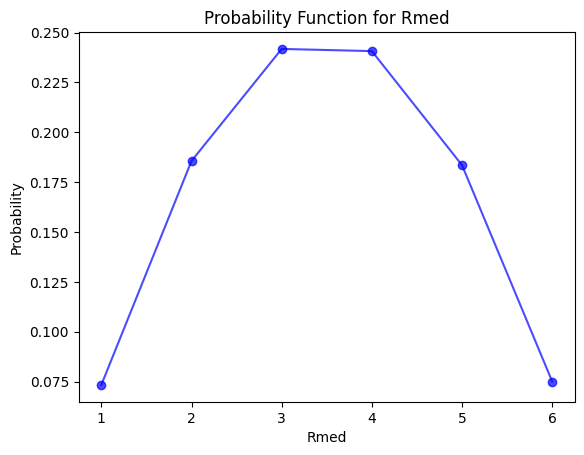

In [76]:
#plot the probability function for Rmed
def plot_probability_function(values, probabilities, title):
  plt.scatter(values, probabilities, color='blue', alpha=0.7)
  plt.plot(values, probabilities, color='blue', alpha=0.7)
  plt.title(title)
  plt.xlabel('Rmed')
  plt.ylabel('Probability')
  plt.show()

values, counts = np.unique(simulated_values, return_counts=True)
probabilities = counts / num_trials
plot_probability_function(values, probabilities, 'Probability Function for Rmed')

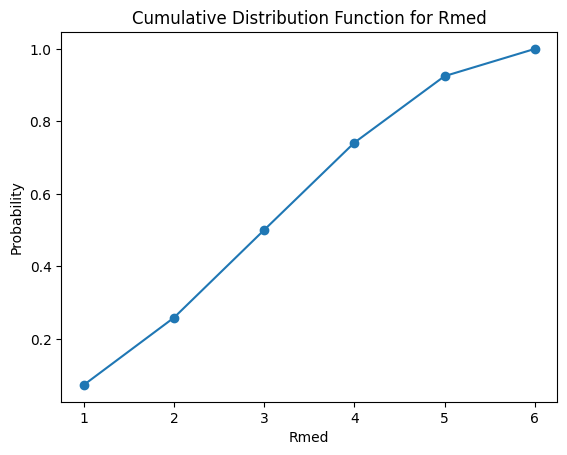

In [77]:
#plot the cdf

def plot_cdf(values, cdf_values, title):
    plt.scatter(values, cdf_values)
    plt.plot(values, cdf_values)
    plt.title(title)
    plt.xlabel('Rmed')
    plt.ylabel('Probability')
    plt.show()

cdf_values = np.cumsum(probabilities)
plot_cdf(values, cdf_values, 'Cumulative Distribution Function for Rmed')

In [78]:
#As I stated before, the expected value of Rmed is either 3 or 4 with a slightly higher probability that it is 4 based on this simulation.

# Calculate expected value of Rmed
expected_value = np.mean(simulated_values)
print(f'Expected Value of Rmed: {expected_value:.4f}')

Expected Value of Rmed: 3.5004


1.3 - Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers. (Hint: The while loop might be useful in this case.)

In [79]:
#simulation function (using while loop and law of large numbers)
def simulation():
  total = 0
  while True:
        roll = np.random.randint(1, 7)
        total += roll
        if roll == 6:
            break
  return total

simulated_values = [simulation() for i in range(num_trials)] #num trials is still 100,000 from earlier but can be adjusted if needed

expected_value = np.mean(simulated_values)
print(f'Expected Value: {expected_value:.4f}')

Expected Value: 21.1074


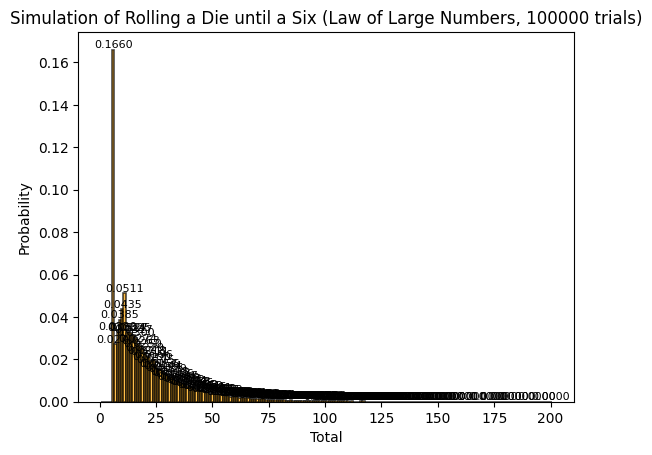

In [80]:
# Plot histogram of simulated values with exact probabilities - from chatGPT
plt.hist(simulated_values, bins=np.arange(1, max(simulated_values) + 2) - 0.5, density=True, color='orange', alpha=0.7, edgecolor='black', linewidth=1.2)

# Calculate and plot exact probabilities on top of each bar
values, counts = np.unique(simulated_values, return_counts=True)
probabilities = counts / num_trials

for value, probability in zip(values, probabilities):
    plt.text(value, probability, f'{probability:.4f}', ha='center', va='bottom', fontsize=8)

plt.title(f'Simulation of Rolling a Die until a Six (Law of Large Numbers, {num_trials} trials)')
plt.xlabel('Total')
plt.ylabel('Probability')
plt.show()

It appears from the graph above that the most likely total (expected value) is around 5.

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [101]:
#2.1

#load mammogram data
df = pd.read_csv('./the_bootstrap/data/mammogram.csv', low_memory=False)

#cross tab for treatment and breast_cancer_death
pd.crosstab(df['treatment'],df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


The difference in 25-year survival rates between the control and mammogram groups is not a lot. It appears that there were more participants in the mammogram group, but 5 more participants died in the control group compared to the mammogram group, and 20 more women survived in the mammogram group compared to the control group.

In [102]:
print(df.head())
print(df.dtypes)

   treatment breast_cancer_death
0  mammogram                 yes
1  mammogram                 yes
2  mammogram                 yes
3  mammogram                 yes
4  mammogram                 yes
treatment              object
breast_cancer_death    object
dtype: object


In [103]:
# Convert 'yes' and 'no' to 1 and 0 in the 'breast_cancer_death' column
df['breast_cancer_death'] = df['breast_cancer_death'].map({'yes': 1, 'no': 0})

In [104]:
print(df.head())
print(df.dtypes)

   treatment  breast_cancer_death
0  mammogram                    1
1  mammogram                    1
2  mammogram                    1
3  mammogram                    1
4  mammogram                    1
treatment              object
breast_cancer_death     int64
dtype: object


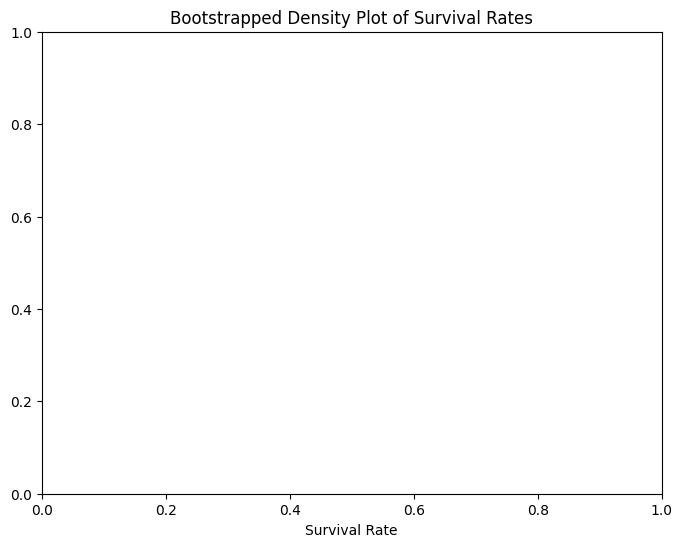

In [107]:
#2.2 - bootstrap the densities and distributions of survival rates for the two groups.

#based on the code from the bootstrap lecture in class

# Convert 'yes' and 'no' to 1 and 0 in the 'breast_cancer_death' column
#df['breast_cancer_death'] = df['breast_cancer_death'].map({'yes': 1, 'no': 0})

# control data:
df_c = df.loc[(df['breast_cancer_death'] == 'yes') & (df['treatment'] == 'control')]
N_c = df_c.shape[0]

# mammogram data:
df_m = df.loc[(df['breast_cancer_death'] == 'yes') & (df['treatment'] == 'mammogram')]
N_m = df_m.shape[0]

# Simulation:
S = 1000
rate_c = np.zeros(S)  # control death rate
rate_m = np.zeros(S)  # mammogram death rate
diff = np.zeros(S)    # Difference in death rates

# Bootstrapping:
for s in range(S):
    sample_c = df_c.sample(N_c, axis=0, replace=True)  # Resample control
    rate_c[s] = pd.to_numeric(sample_c['breast_cancer_death']).mean()  # Mean death rate, control

    sample_m = df_m.sample(N_m, axis=0, replace=True)  # Resample mammogram
    rate_m[s] = pd.to_numeric(sample_m['breast_cancer_death']).mean()  # Mean death rate, mammogram

    diff[s] = rate_c[s] - rate_m[s]  # Difference in rates

# Combine results into one dataframe for plotting:
rdf_c = pd.DataFrame({'treatment': 'control', 'death_rate': rate_c})
rdf_m = pd.DataFrame({'treatment': 'mammogram', 'death_rate': rate_m})
rdf = pd.concat([rdf_c, rdf_m], axis=0)

# Density plot of death rates:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=rdf, x='death_rate', hue='treatment', fill=True)
plt.title('Bootstrapped Density Plot of Survival Rates')
plt.xlabel('Survival Rate')
plt.show()

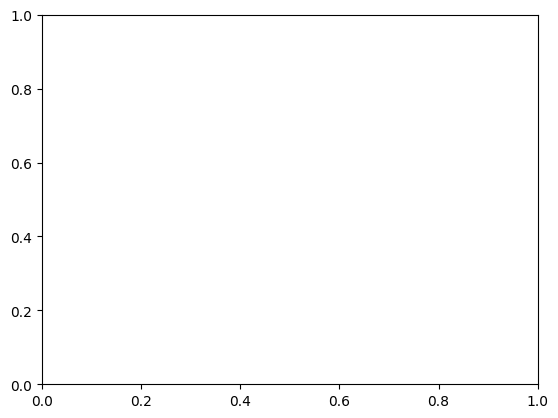

In [95]:
# ECDF of death rates:
sns.ecdfplot(data=rdf,x='death_rate',hue='treatment')
plt.show()



<ipython-input-96-3d063b54933d>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(diff)


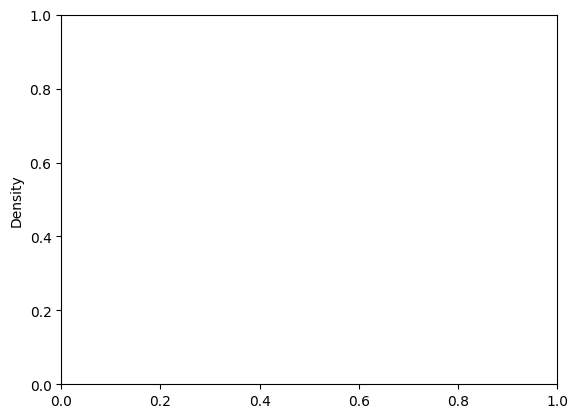

In [96]:
# Density plot of differences in rates:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0)
plt.show()



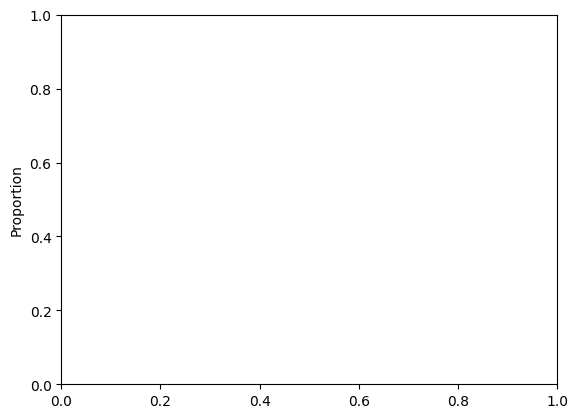

In [97]:
# ECDF of differences in rates:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0)
plt.show()

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.